# Pymaceuticals Inc.
---

### Analysis
- Capomulin and Ramicane appear to be more effective in reducing tumor volume compared to other regimens, as they have lower mean tumor volumes.
- The distribution of male and female mice is roughly balanced, which is important for conducting gender-related analyses.
- The presence of potential outliers in the Infubinol regimen suggests that further investigation may be needed for those specific data points.
- The strong positive correlation between mouse weight and average tumor volume suggests that as mouse weight increases, tumor volume tends to increase as well. This relationship is supported by the positive slope of the regression line.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
unique_mice_count = combined_data["Mouse ID"].nunique()
print(f"The number of unique mice is: {unique_mice_count}")

The number of unique mice is: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
bad_mice = duplicate_mice["Mouse ID"].unique()
bad_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mice_row_series = combined_data["Mouse ID"].isin(bad_mice)
print(type(bad_mice_row_series))
~bad_mice_row_series
duplicate_mice_data = combined_data[bad_mice_row_series]
duplicate_mice_data

<class 'pandas.core.series.Series'>


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data[~bad_mice_row_series]
print(clean_combined_data.shape) #to check if duplicates are removed
clean_combined_data.head()

(1880, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_clean = clean_combined_data["Mouse ID"].nunique()
print(f"Number of unique mice in the clean DataFrame is: {unique_mice_count_clean}")

Number of unique mice in the clean DataFrame is: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data= clean_combined_data.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_data = clean_combined_data.groupby("Drug Regimen")
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_data["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = grouped_data["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})

# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = grouped_data["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

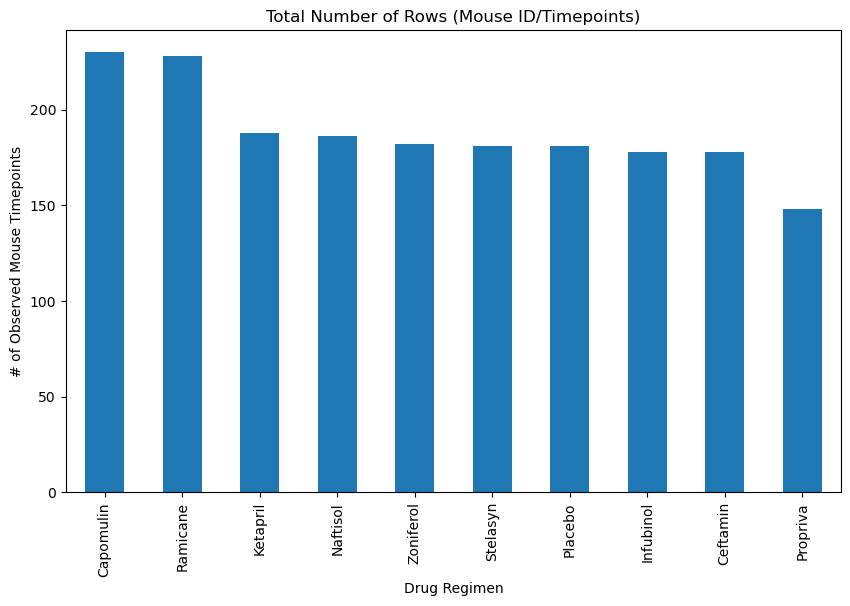

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_combined_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows (Mouse ID/Timepoints)")
plt.show()

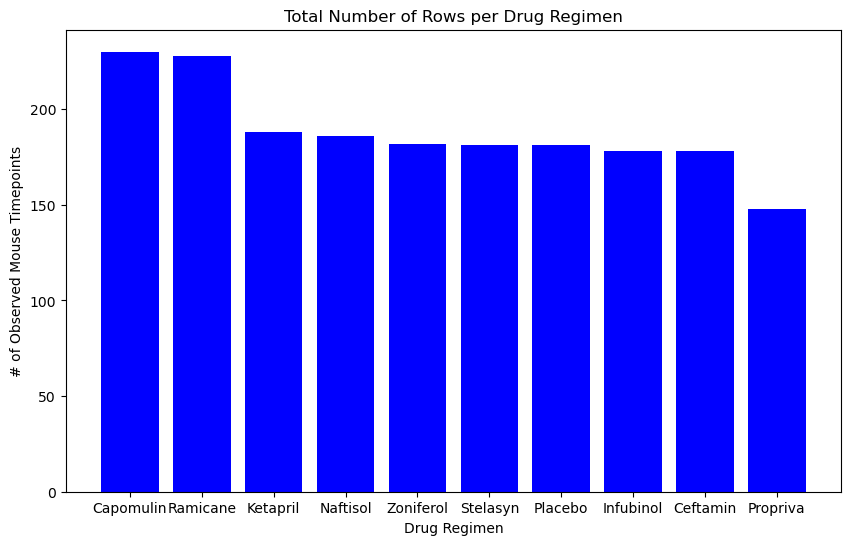

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_combined_data["Drug Regimen"].value_counts()
regimen_names = regimen_counts.index
row_counts = regimen_counts.values
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, row_counts, color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows per Drug Regimen")
plt.show()

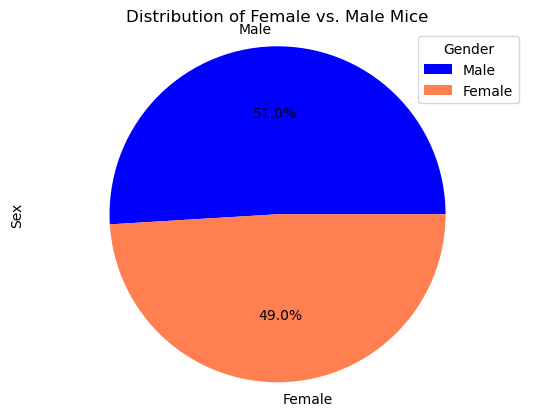

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_combined_data["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct="%1.1f%%", colors=["blue", "coral"])
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")  
plt.legend(gender_distribution.index, title="Gender", loc="upper right")
plt.show()

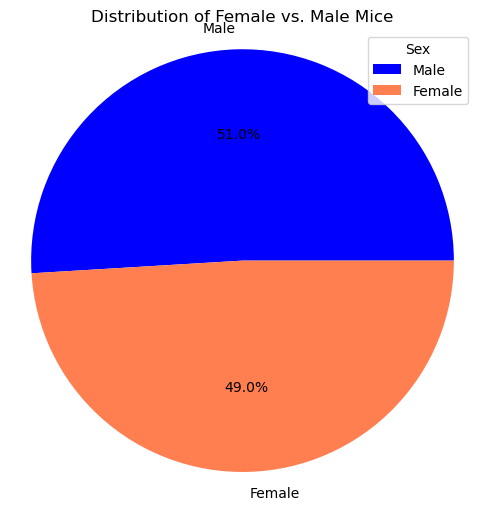

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_combined_data["Sex"].value_counts()
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", colors=["blue", "coral"])
plt.title("Distribution of Female vs. Male Mice")
plt.legend(gender_distribution.index, title="Sex", loc="upper right")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
selected_data = clean_combined_data[clean_combined_data["Drug Regimen"].isin(selected_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = selected_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, selected_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume = merged_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [16]:
# Put treatments into a list for the for loop (and later for plot labels)
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Loop through each regimen
for regimen in selected_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # Add tumor volume data to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the quartiles and IQR for the regimen's tumor volumes
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the upper and lower bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Find potential outliers
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print results for potential outliers
    if not potential_outliers.empty:
        print(f"{regimen}'s potential outliers: {potential_outliers}")
    else:
        print(f"{regimen}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


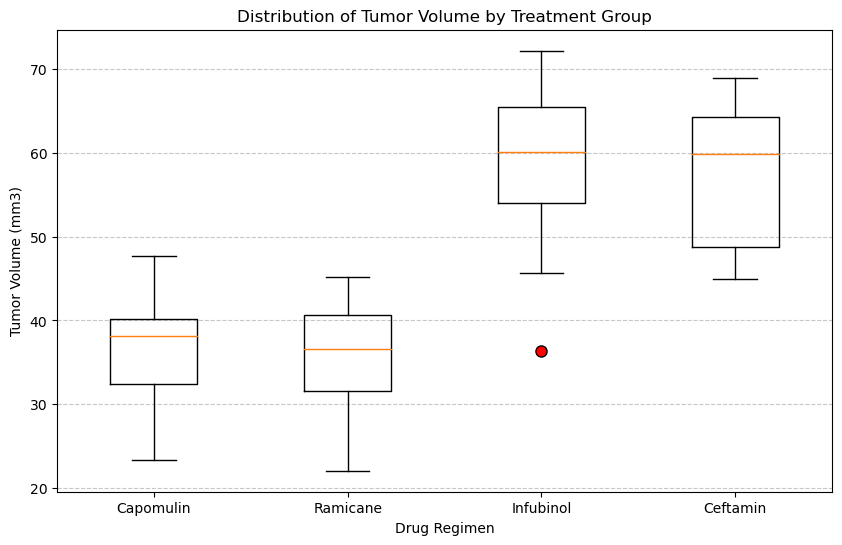

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data = [tumor_volume_data[0], tumor_volume_data[1], tumor_volume_data[2], tumor_volume_data[3]]

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.boxplot(data, labels=selected_regimens, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})

plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume by Treatment Group")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
target_mouse_id = 'l509'
mouse_data = clean_combined_data[(clean_combined_data['Drug Regimen'] == 'Capomulin') & (clean_combined_data['Mouse ID'] == target_mouse_id)]
mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


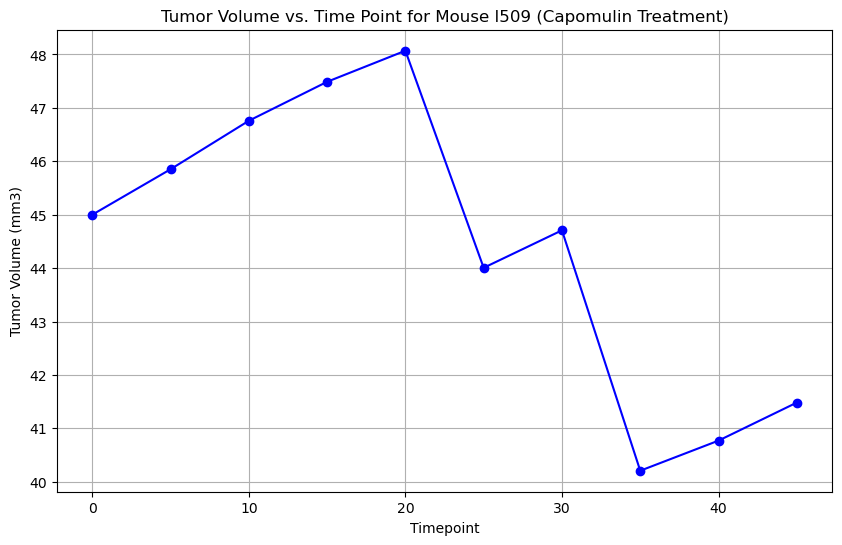

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {target_mouse_id} (Capomulin Treatment)')
plt.grid(True)
plt.show()

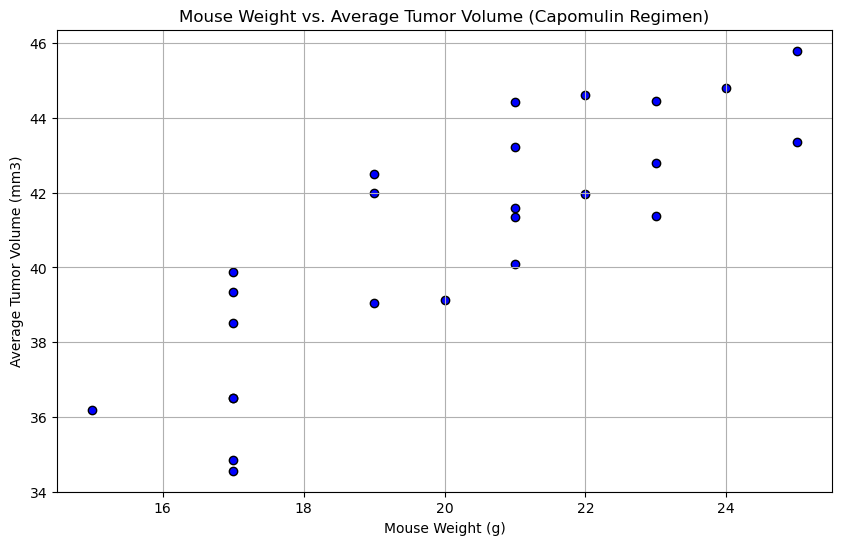

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


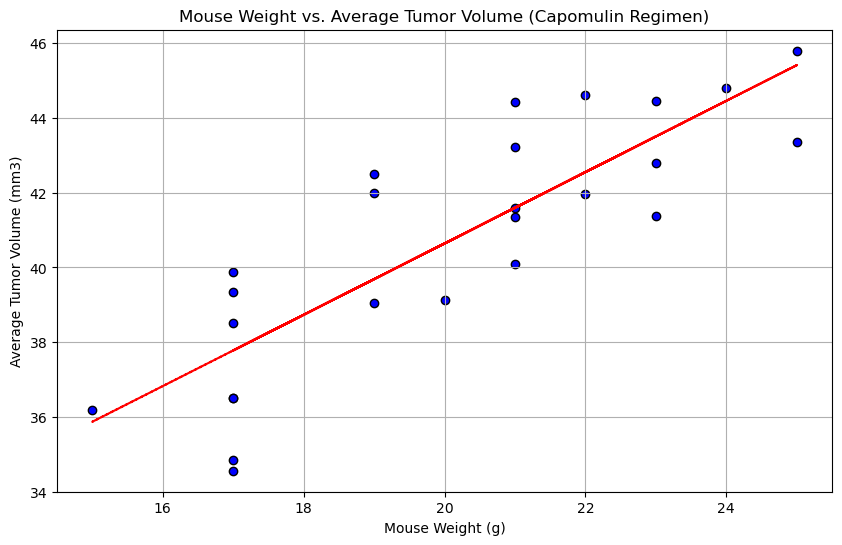

The correlation coefficient (r) is 0.84
The slope of the regression line is 0.95


In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np 
from scipy.stats import linregress
capomulin_data = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID to calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(mouse_weights, average_tumor_volume)[0, 1]

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Create a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

# Add the regression line to the plot
regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Show the plot
plt.grid(True)
plt.show()

print(f"The correlation coefficient (r) is {r_value:.2f}")
print(f"The slope of the regression line is {slope:.2f}")
